# Project: Pima Indians Diabetes Medical Records - Using Data Analysis and Visual Tools to Predict Diabetes

## BIOF 309

## Anuj Kashyap



#### What is our project question? 
Are we able to determine which factors affect diabetes in Pima Indians population?

#### Context
Where did the data come from? 
National Institute of Diabetes and Digestive and Kidney Diseases. 

#### Diabetes information:

What is diabetes?: If body does not produce or properly use insulin, it is released out through urination. This is called diabetes.

#### How many Americans have diabetes?
20.8 million children and adults (7% of population)
(American Diabetes Association, 2007)

#### Pima Indian Diabetes (PID) dataset contains what?
768 records describing female patients of Pima Indian heritage which are 21 years old living in Phoenix, Arizona, USA (UCI-Machine-Learning Repository, 2007)

#### What do we want to do with this dataset?
To diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements  

#### What are some contraints with working with this dataset? 
Several constraints were placed on the selection of these instances from a larger database. 
All patients here are females at least 21 years old of Pima Indian heritage.

#### What medical predictors are included in this dataset? 
Several medical predictor variables such as the number of pregnancies the patient has had, their BMI, insulin level, age, etc.

#### Is there a target variable?
Yes, one target variable, Outcome. 

#### Reference:
kaggle datasets download -d uciml/pima-indians-diabetes-database
https://www.kaggle.com/uciml/pima-indians-diabetes-database/downloads/pima-indians-diabetes-database.zip/1

Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

#### Inspiration:
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

In [1]:
import pandas as pd

## Read input data
Read the input CSV file as a pandas dataframe

In [9]:
filename = "Desktop\diabetes.csv"

df = pd.read_csv(filename, sep=',', encoding='utf-8', header=0)

In [72]:
# Assigning column names and mapping the meta information for each attribute
cols = df.columns = ['n_pregnant', 'glu_conc', 'bp', 'tst', 'insulin', 'bmi', 'dpf', 'age', 'diabetes?']
metainfo = {'n_pregnant': 'Number of times pregnant',
                     'glu_conc': 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
                     'bp': 'Diastolic blood pressure (mm Hg)',
                     'tst': 'Triceps skin fold thickness (mm)',
                     'insulin': '2-Hour serum insulin (mu U/ml)',
                     'bmi': 'Body mass index (weight in kg/(height in m)^2)',
                     'dpf': 'Diabetes pedigree function',
                     'age': 'Age (years)',
                     'diabetes?': 'Class variable (0 or 1)'}

df.head()

n_pregnant  glu_conc  bp  tst  insulin   bmi    dpf  age  diabetes?
0           6       148  72   35        0  33.6  0.627   50          1
1           1        85  66   29        0  26.6  0.351   31          0
2           8       183  64    0        0  23.3  0.672   32          1
3           1        89  66   23       94  28.1  0.167   21          0
4           0       137  40   35      168  43.1  2.288   33          1

In [71]:
# Describe the dataset
df_temp = df.drop(labels = 'diabetes?', axis=1)
df_temp.describe()

n_pregnant    glu_conc          bp         tst     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

              dpf         age  
count  768.000000  768.000000  
mean     0.471876   33.240885  
std      0.331329   11.760232  
min      0.078000   21.000000  
25%      0.243750   24.000000  
50%      0.372500   29.000000  
75%      0.626250   41.000000  
max      2.420000   81.000000

In [62]:
import numpy as np
import matplotlib.pyplot as plt
def bar_plot(df):
    plt.rcParams['figure.figsize'] = 12, 6
    df_0 = df[df['diabetes?'] == 0]
    df_1 = df[df['diabetes?'] == 1]
    mean_0 = df_0.mean()
    mean_1 = df_1.mean()
    list_0 = []
    list_1 = []
    for col in df.columns:
        list_0.append(mean_0[col])
        list_1.append(mean_1[col])

    index = np.arange(len(df.columns))
    bar_width = 0.35
    opacity = 0.8

    plt.bar(index, list_0, bar_width,
            alpha=opacity,
            color='b',
            label='Diabetes (-ve)')

    plt.bar(index + bar_width, list_1, bar_width,
            alpha=opacity,
            color='g',
            label='Diabebtes (+ve)')

    plt.title('Pima Indians Diabetes Dataset')
    plt.xticks(index + bar_width, tuple(df.columns))
    plt.legend()

    plt.tight_layout()
    plt.show()

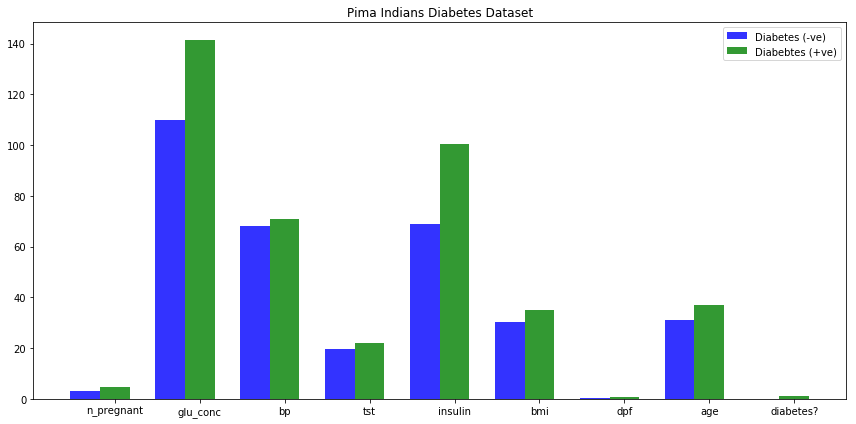

In [63]:
bar_plot(df)

In [ ]:
#What did we find from the bar plot analysis? We can analyze that insulin and glucose concentrations (glu_conc) are significantly higher in women whose diabetes test is diagnosed positive. 
#One should consider that other attributes might be impacting the diabetes significantly 
#From our bar graph plot, we didn't find any significant difference in the other attributes.

In [64]:
def box_plot(df, cols):
    plt.rcParams['figure.figsize'] = 12, 6
    data = np.array(df.values.tolist())
    plt.boxplot(data, labels=cols, showmeans=True)
    plt.show()

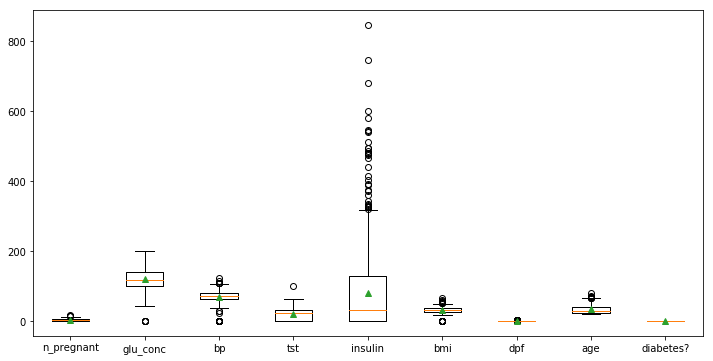

In [65]:
box_plot(df, df.columns)

#Normalize our data using pandas in a very simple and intuitive way i.e.  (x-mean)/(max-min)

In [83]:
def normalize(df):
    df_norm = (df - df.mean()) / (df.max() - df.min())
    return df_norm
from pandas.plotting import scatter_matrix as pplotsm
def scatter_matrix(df):
    plt.rcParams["figure.figsize"] = (14, 14)
    colors = list('r' if i >= 0.5 else 'b' for i in df['diabetes?'])
    pplotsm(df, color=colors)
    plt.show()

In [84]:
normalized_df.head()

n_pregnant  glu_conc        bp       tst   insulin       bmi       dpf  \
0    0.126762  0.136208  0.023726  0.146096 -0.094326  0.023956  0.066236   
1   -0.167356 -0.180375 -0.025455  0.085490 -0.094326 -0.080366 -0.051612   
2    0.244409  0.312088 -0.041848 -0.207439 -0.094326 -0.129547  0.085450   
3   -0.167356 -0.160274 -0.025455  0.024884  0.016785 -0.058012 -0.130178   
4   -0.226180  0.080932 -0.238569  0.146096  0.104256  0.165535  0.775458   

        age  diabetes?  
0  0.279319   0.651042  
1 -0.037348  -0.348958  
2 -0.020681   0.651042  
3 -0.204015  -0.348958  
4 -0.004015   0.651042

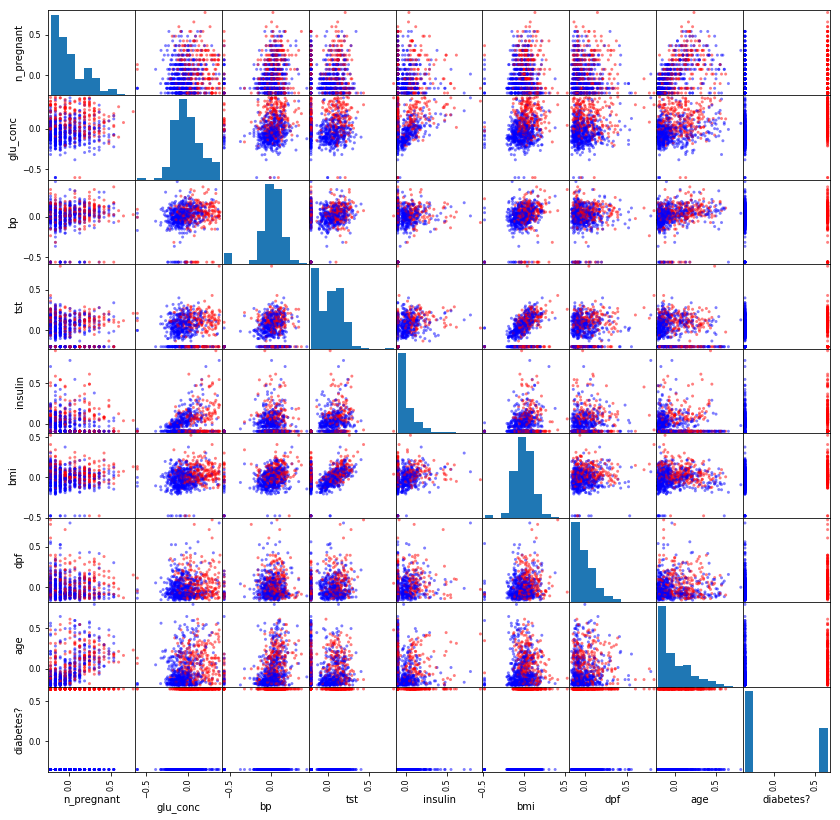

In [85]:
normalized_df = normalize(df)
scatter_matrix(normalized_df)

In [ ]:
#visualize the bivariate relationship between each variable using a scatter plot. 
#normalized data for plotting the scattered matrix was used
#Both are overlapping with each other

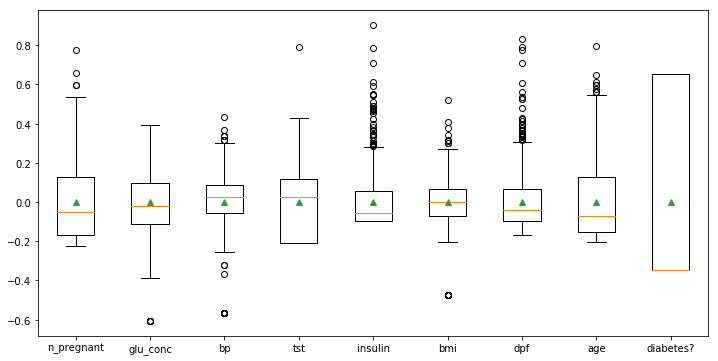

In [66]:
box_plot(normalized_df, df.columns)

In [67]:
def stacked_histogram(df, cols):
    fig, axes = plt.subplots(3, 3, sharey=True) # Because I have 9 variables in the dataset
    plt.rcParams['figure.figsize'] = 14, 14
    df_1 = df[df['diabetes?'] == 1]
    df_2 = df[df['diabetes?'] == 0]
    col_index = 0
    for row in axes:
        for col in row:
            col.hist([df_2[cols[col_index]], df_1[cols[col_index]]], bins=10, stacked=True, color=['b', 'g'])
            col.set_ylabel(cols[col_index])
            col_index += 1
    plt.show()

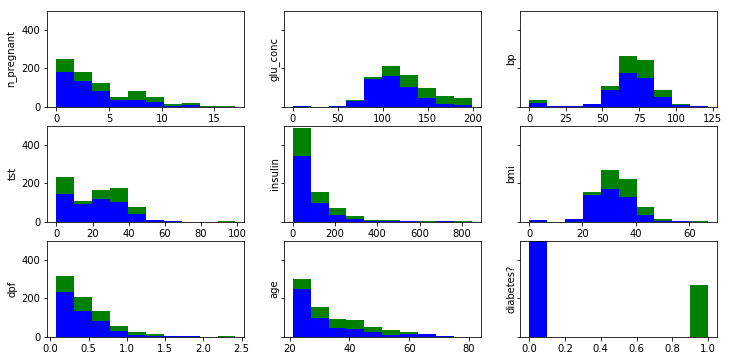

In [68]:
stacked_histogram(df, df.columns)

In [ ]:
#Green bars shows the women with positive diabetes test and blue bars shows the women with negative diabetes test.
#In glu_conc we see that diabetes are diagnosed to those women having high glucose concentration levels. 
#Similarly, bp (blood pressure diastolic) histogram shows that positive diabetes was found in women with high bp. 
#Although there were samples where high bp women had a negative test but positive diabetes was found only with high bp. 
#Insulin histogram shows that women with lower insulin levels have a positive diabetes test.